<a href="https://colab.research.google.com/github/jaassoon/lihang_book_algorithm/blob/master/perceptron/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

numlines表示产生的数据点数，这里是200个点

为了测试该算法，这里简单模拟生成数据进行测试。假设生成的数据都是线性可分的，  
那么只需要在坐标轴上随机生成大量的数据点，再用一条标准线进行分类。  
然后用这些分类的数据进行训练，查看训练出的模型与标准线的差距。

In [0]:
def makePLAData(w,b, numlines):
    w = np.array(w)
    numFeatures = len(w)
    x = np.random.rand(numlines, numFeatures) * 20  #随机产生numlines个数据的数据集
    cls = np.sign(np.sum(w*x,axis=1)+b)    #用标准线 w*x+b=0进行分类
    dataSet = np.column_stack((x,cls))
    #至此样例数据已经生成

    #下面是存储标准分类线，以便显示观察
    x = np.linspace(0, 20, 500)      #创建分类线上的点，以点构线。
    y = -w[...,0] / w[...,1] * x - b / w[...,1]
    rows = np.column_stack((x.T, y.T, np.zeros((500, 1))))
    dataSet = np.row_stack((dataSet, rows))

    return dataSet

In [0]:
def showFigure(dataSet):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_title('Linear separable data set')
    plt.xlabel('X')
    plt.ylabel('Y')
    #图例设置
    labels = ['classOne', 'standarLine', 'classTow', 'modelLine']
    markers = ['o','.','x','.']
    colors = ['r','y','g','b']
    for i in range(4):
        idx = np.where(dataSet[:,2]==i-1)   #找出同类型的点，返回索引值
        ax.scatter(dataSet[idx, 0], dataSet[idx, 1], marker=markers[i], color=colors[i], label=labels[i], s=10)

    plt.legend(loc = 'upper right')
    plt.show()


def PLA_train(dataSet,plot = False):
    numLines = dataSet.shape[0]
    numFeatures = dataSet.shape[1]
    #模型初始化
    w = np.ones((1, numFeatures-1))
    b = 0.1
    k = 1
    i = 0
    #用梯度下降方法，逐渐调整w和b的值
    while i<numLines:
        if dataSet[i][-1] * (np.sum(w * dataSet[i,0:-1],)+ b) <0:
            w = w + k*dataSet[i][-1] * dataSet[i,0:-1]
            b = b + k*dataSet[i][-1]
            i =0
        else:
            i +=1

    #到这里参数w和b已经训练出来了，模型训练到此为止
    #下面是为了存储分类线，以便显示观察。
    x = np.linspace(0,20,500)    #创建分类线上的点，以点构线。
    y = -w[0][0]/w[0][1]*x - b/w[0][1]
    rows = np.column_stack((x.T,y.T,2*np.ones((500,1))))
    dataSet = np.row_stack((dataSet,rows))

    showFigure(dataSet)
    return w, b

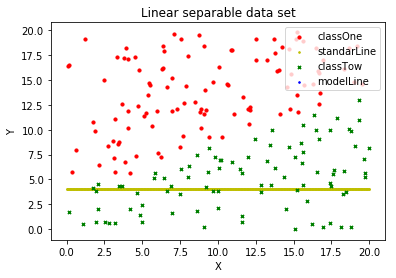

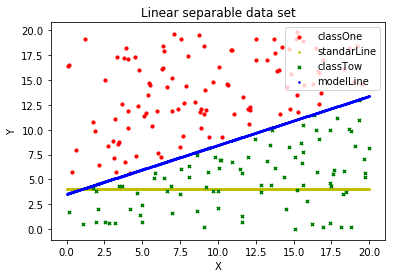

w=[[ 46.27255845 -93.94378277]] 
b=332.1


In [13]:
#测试：
dataSet = makePLAData([1,-2],7,200)
showFigure(dataSet)
w,b= PLA_train(dataSet,True)
print('w={} \nb={}'.format(w,b))